# Pytorch Workflow Fundamentals

1: "data (prepare and load)",

2: "build model",

3: "fitting the model to data (training)",

4: "making predictions and evaluating a model (inference)",

5: "saving and loading a model",

6: "putting it all together"


## Data Preparation
**Making data into tensors**

In [1]:
import torch
from torch import nn
## nn has all building blocks of pytorch, like layers, loss functions, etc.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

torch.__version__

'2.0.1+cu117'

In [20]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
331,332,Female,53,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None
252,253,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
289,290,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
97,98,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None
174,175,Male,41,Lawyer,7.6,8,90,5,Normal,130/85,70,8000,None
223,224,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
198,199,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
237,238,Female,44,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [22]:
data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [23]:
data.drop('Person ID', axis=1,inplace=True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [24]:
data.nunique()

Gender                      2
Age                        31
Occupation                 11
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                4
Blood Pressure             25
Heart Rate                 19
Daily Steps                20
Sleep Disorder              3
dtype: int64

In [61]:
count_bmi=data.groupby(['BMI Category', 'Sleep Disorder']).size().reset_index(name='counts')
count


,BMI Category,Sleep Disorder,counts
0,Normal,Insomnia,7
1,Normal,None,183
2,Normal,Sleep Apnea,5
3,Normal Weight,Insomnia,2
4,Normal Weight,None,17
5,Normal Weight,Sleep Apnea,2
6,Obese,Insomnia,4
7,Obese,Sleep Apnea,6
8,Overweight,Insomnia,64
9,Overweight,None,19


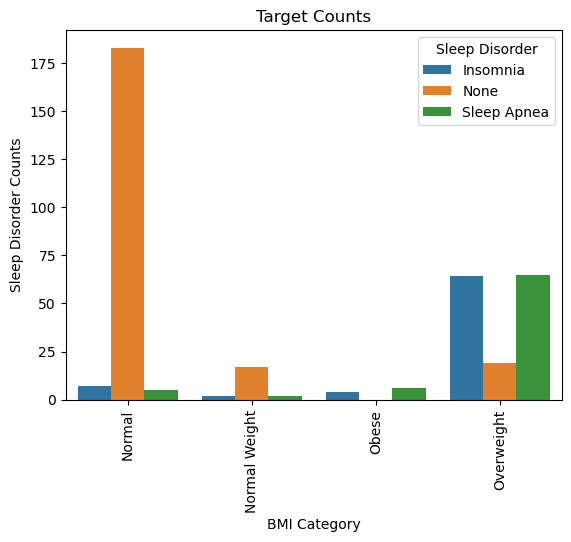

In [59]:
# ax = sns.barplot(data=count, x='BMI Category', y='counts', hue="Sleep Disorder")

sns.barplot(data=count_bmi, x='BMI Category', y='counts', hue="Sleep Disorder")
plt.xticks(rotation = 90)
plt.title('Target Counts')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Disorder Counts')
plt.show()
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')



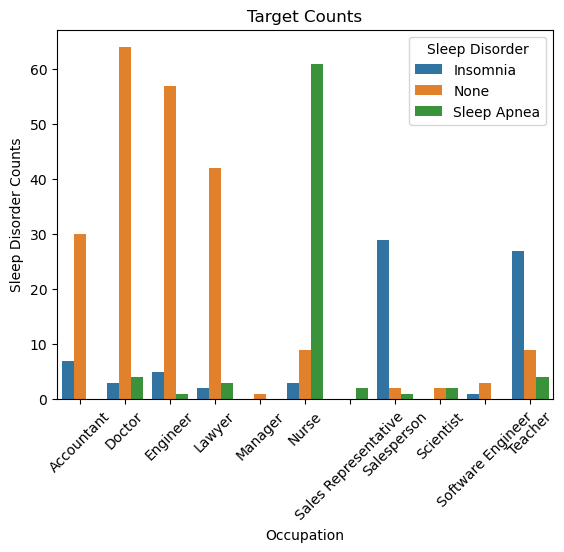

In [64]:
count_job=data.groupby(['Occupation', 'Sleep Disorder']).size().reset_index(name='counts')

sns.barplot(data=count_job, x='Occupation', y='counts', hue="Sleep Disorder")
plt.xticks(rotation = 45)
plt.title('Target Counts')
plt.xlabel('Occupation')
plt.ylabel('Sleep Disorder Counts')
plt.show()

In [65]:
encode1 = []
encode2 = []
for col in data.columns:
    if data[col].dtype == 'object':
        if len(data[col].unique()) == 2:
            encode1.append(col)
            print(col, data[col].unique())
        else:
            encode2.append(col)
            print(col, data[col].unique())
print("\nLinear encoding",encode1)
encode2.remove("Sleep Disorder")
encode2.remove("Blood Pressure")
print("One hot encoding",encode2)

Gender ['Male' 'Female']
Occupation ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder ['None' 'Sleep Apnea' 'Insomnia']

Linear encoding ['Gender']
One hot encoding ['Occupation', 'BMI Category']


In [66]:
data[["Systolic BP", "Diastolic BP"]] = data['Blood Pressure'].str.split('/', expand=True)
data["Systolic BP"] = data["Systolic BP"].astype('int')
data["Diastolic BP"] = data["Diastolic BP"].astype('int')
data.drop('Blood Pressure',axis=1,inplace=True)

data.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
91,Male,35,Engineer,7.3,8,60,4,Normal,65,5000,None,125,80
315,Female,53,Engineer,8.3,9,30,3,Normal,65,5000,Insomnia,125,80
250,Female,45,Teacher,6.8,7,30,6,Overweight,65,6000,Insomnia,135,90
38,Male,31,Doctor,7.6,7,75,6,Normal,70,8000,None,120,80
59,Male,32,Doctor,7.7,7,75,6,Normal,70,8000,None,120,80


In [67]:
data = pd.get_dummies(data, columns=encode2, drop_first=True)
data.sample(5)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
353,Female,58,8.0,9,75,3,68,7000,Sleep Apnea,140,...,0,1,0,0,0,0,0,0,0,1
235,Male,44,6.3,6,45,7,72,6000,Insomnia,130,...,0,0,0,1,0,0,0,0,0,1
258,Female,45,6.6,7,45,4,65,6000,Insomnia,135,...,0,0,0,0,0,0,1,0,0,1
181,Male,42,7.8,8,90,5,70,8000,None,130,...,0,0,0,0,0,0,0,0,0,0
309,Female,52,6.6,7,45,7,72,6000,Insomnia,130,...,0,0,0,0,0,0,0,0,0,1


In [68]:
data = pd.get_dummies(data, columns=encode1, drop_first=True)
data.sample(5)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Gender_Male
106,37,6.1,6,42,6,77,4200,None,126,83,...,1,0,0,0,0,0,0,0,1,0
239,44,6.4,6,45,7,72,6000,Insomnia,130,85,...,0,0,1,0,0,0,0,0,1,1
144,38,7.1,8,60,5,68,8000,Sleep Apnea,130,85,...,0,0,0,0,0,0,0,0,0,1
256,45,6.6,7,45,4,65,6000,Insomnia,135,90,...,0,0,0,0,0,1,0,0,1,0
224,44,6.6,7,45,4,65,6000,Insomnia,135,90,...,0,0,0,0,0,1,0,0,1,0


In [69]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Occupation_Doctor,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Gender_Male
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733,0.189840,...,0.195187,0.005348,0.085561,0.010695,0.010695,0.106952,0.056150,0.026738,0.395722,0.505348
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611,0.392699,...,0.396876,0.073029,0.280090,0.103001,0.103001,0.309466,0.230519,0.161533,0.489660,0.500641
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
data.isnull().sum()

Age                                0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
Heart Rate                         0
Daily Steps                        0
Sleep Disorder                     0
Systolic BP                        0
Diastolic BP                       0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Manager                 0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
BMI Category_Normal Weight         0
BMI Category_Obese                 0
BMI Category_Overweight            0
Gender_Male                        0
dtype: int64

In [71]:
# Inspecting Target Variable
data['Sleep Disorder'].value_counts()

# Encoding Target variable
data['Sleep Disorder'] = data['Sleep Disorder'].map({'None':0, 'Insomnia':1, 'Sleep Apnea':2})
data.sample(20)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Gender_Male
166,41,7.3,8,70,6,72,6200,0,121,79,...,0,0,0,0,0,0,1,0,0,1
18,29,6.5,5,40,7,80,4000,1,132,87,...,1,0,0,0,0,0,1,0,0,0
322,53,8.4,9,30,3,65,5000,0,125,80,...,0,0,0,0,0,0,0,0,0,0
9,29,7.8,7,75,6,70,8000,0,120,80,...,0,0,0,0,0,0,0,0,0,1
2,28,6.2,6,60,8,75,10000,0,125,80,...,0,0,0,0,0,0,0,0,0,1
292,50,6.1,6,90,8,75,10000,2,140,95,...,1,0,0,0,0,0,0,0,1,0
148,39,6.9,7,50,6,75,5500,0,128,85,...,0,0,0,0,0,0,1,0,0,0
283,50,6.0,6,90,8,75,10000,2,140,95,...,1,0,0,0,0,0,0,0,1,0
365,59,8.0,9,75,3,68,7000,2,140,95,...,1,0,0,0,0,0,0,0,1,0
175,41,7.6,8,90,5,70,8000,0,130,85,...,0,0,0,0,0,0,0,0,0,1


In [72]:
data.dtypes

Age                                  int64
Sleep Duration                     float64
Quality of Sleep                     int64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
Sleep Disorder                       int64
Systolic BP                          int64
Diastolic BP                         int64
Occupation_Doctor                    uint8
Occupation_Engineer                  uint8
Occupation_Lawyer                    uint8
Occupation_Manager                   uint8
Occupation_Nurse                     uint8
Occupation_Sales Representative      uint8
Occupation_Salesperson               uint8
Occupation_Scientist                 uint8
Occupation_Software Engineer         uint8
Occupation_Teacher                   uint8
BMI Category_Normal Weight           uint8
BMI Category_Obese                   uint8
BMI Category_Overweight              uint8
Gender_Male

In [73]:
data.nunique()

Age                                31
Sleep Duration                     27
Quality of Sleep                    6
Physical Activity Level            16
Stress Level                        6
Heart Rate                         19
Daily Steps                        20
Sleep Disorder                      3
Systolic BP                        18
Diastolic BP                       17
Occupation_Doctor                   2
Occupation_Engineer                 2
Occupation_Lawyer                   2
Occupation_Manager                  2
Occupation_Nurse                    2
Occupation_Sales Representative     2
Occupation_Salesperson              2
Occupation_Scientist                2
Occupation_Software Engineer        2
Occupation_Teacher                  2
BMI Category_Normal Weight          2
BMI Category_Obese                  2
BMI Category_Overweight             2
Gender_Male                         2
dtype: int64

### Data split

In [75]:
y = data['Sleep Disorder']
X = data.drop('Sleep Disorder',axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69, stratify=y)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Converting to tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)


(280, 23) (94, 23) (280,) (94,)
torch.Size([280, 23]) torch.Size([94, 23]) torch.Size([280]) torch.Size([94])
torch.float32 torch.float32 torch.int64 torch.int64


## Building Model


We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

0. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
1. Constructing a model by subclassing nn.Module.
2. Defining a loss function and optimizer.
3. Creating a training loop 

The good news is we've been through all of the above steps before in notebook 01.

Except now we'll be adjusting them so they work with a classification dataset.
.

In [76]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [124]:
class ClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=23, out_features=32), # 23 columns in train data
        nn.ReLU(),
        nn.Linear(in_features=32,out_features=32),
        nn.Sigmoid(),  
        nn.Linear(in_features=32,out_features=8),
        nn.Linear(in_features=8,out_features=3), # one output for each class
        nn.ReLU(),

        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)
    
model_0 = ClassModel().to(device)
model_0

ClassModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=23, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=32, out_features=8, bias=True)
    (5): Linear(in_features=8, out_features=3, bias=True)
    (6): ReLU()
  )
)

In [125]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 94, Shape: torch.Size([94, 3])
Length of test samples: 94, Shape: torch.Size([94])

First 10 predictions:
tensor([[0.0000, 0.3468, 0.2769],
        [0.0000, 0.3468, 0.2769],
        [0.0000, 0.3468, 0.2769],
        [0.0000, 0.3468, 0.2769],
        [0.0000, 0.3468, 0.2769],
        [0.0000, 0.3468, 0.2769],
        [0.0000, 0.3440, 0.2726],
        [0.0000, 0.3468, 0.2769],
        [0.0000, 0.3468, 0.2769],
        [0.0000, 0.3468, 0.2769]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1, 2, 0, 0, 2, 0, 0, 0, 1, 0], device='cuda:0')


In [135]:
# Create a loss function
loss_fn = nn.CrossEntropyLoss() 

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [136]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [137]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 50

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()
#     # Apply gradient clipping here
#     torch.nn.utils.clip_grad_norm_(model_0.parameters(), max_norm=1.0)

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.09861, Accuracy: 58.57% | Test loss: 1.09861, Test acc: 58.51%
Epoch: 10 | Loss: 1.09861, Accuracy: 58.57% | Test loss: 1.09861, Test acc: 58.51%
Epoch: 20 | Loss: 1.09861, Accuracy: 58.57% | Test loss: 1.09861, Test acc: 58.51%
Epoch: 30 | Loss: 1.09861, Accuracy: 58.57% | Test loss: 1.09861, Test acc: 58.51%
Epoch: 40 | Loss: 1.09861, Accuracy: 58.57% | Test loss: 1.09861, Test acc: 58.51%
